<a href="https://colab.research.google.com/github/BiancadeFrancisco/LogisticRegression_Metricas/blob/main/M%C3%A9tricas_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
churn = pd.read_excel("/content/churn_data.xlsx")

churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# COLUNA TOTALCHARGES ESTÁ COMO OBJECT, TRANSFORMAR EM NUMERICA:

churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"], errors="coerce")

In [ ]:
churn.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# VERIFICAR NULOS:

churn.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# REMOVER NULOS:

churn = churn.dropna()

In [ ]:
# FAZER TRAIN TEST SPLIT:

from sklearn.model_selection import train_test_split

In [ ]:
# SEPARAR VARIÁVEIS:

cat_vars = ["PhoneService", "Contract", "PaperlessBilling", "PaymentMethod"] #VARIÁVEL CATEGÓRICA

num_vars = ["tenure", "MonthlyCharges", "TotalCharges"] #VARIÁVEL NUMÉRICA

modeling_vars = cat_vars + num_vars

In [ ]:
# DEFINIR X E Y:

X = churn.filter(modeling_vars).copy()

y = churn["Churn"].copy()

y = pd.DataFrame(y)

In [ ]:
# TRANSFORMAR TODAS AS VARIÁVEIS NÃO NUMÉRICAS:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y.Churn)

y.Churn = le.transform(y.Churn)

In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7037,0
7038,0
7039,0
7040,0


In [ ]:
X =   pd.get_dummies(X)
X.head()

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
# Execute um algoritmo de classificação:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

lr = model.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_test.assign(churn = y_test).assign(label = y_pred)

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
2548,8,69.95,562.70,0,1,1,0,0,0,1,0,1,0,0,0,0
3444,36,35.35,1317.95,1,0,0,1,0,1,0,0,0,0,1,0,0
1611,72,90.95,6468.60,0,1,0,0,1,0,1,1,0,0,0,0,0
2442,7,84.80,546.95,0,1,1,0,0,0,1,0,0,1,0,1,1
1473,24,98.75,2407.30,0,1,1,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,47,106.35,4849.10,0,1,1,0,0,0,1,0,0,1,0,0,1
2591,57,100.60,5611.70,0,1,1,0,0,0,1,0,0,1,0,0,0
3060,25,38.10,970.40,1,0,0,1,0,0,1,0,1,0,0,0,0
2255,1,51.20,51.20,0,1,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
# Importar métricas do módulo sklearn:

from sklearn.metrics import confusion_matrix


In [ ]:
# Execute a função de matriz de confusão em valores reais e previstos

confusion_matrix(y_test, y_pred)


array([[910, 123],
       [161, 213]])

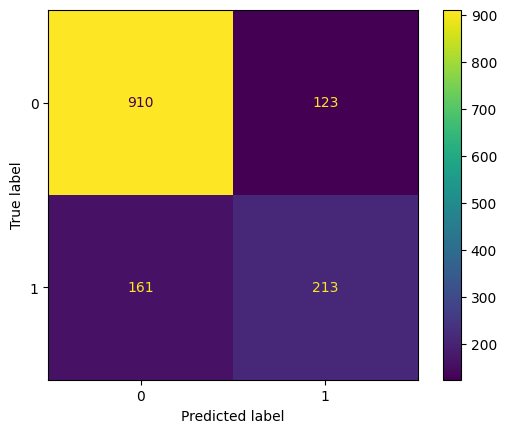

In [ ]:
# PLOTAR MATRIZ CONFUSÃO:

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
color = "white"
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# VERIFICAR MÉTRICAS:

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"Precisão Treino: {precision_score(y_train, lr.predict(X_train))}")
print(f"Precisão Test: {precision_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"Recall Treino: {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall Test: {recall_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"F1 Treino: {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Test: {f1_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])}")
print(f"ROCAUC Test: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}")

Acurácia Treino: 0.7960526315789473
Acurácia Teste: 0.7981520966595593
Acurácia Balanceada Treino: 0.7104768377031374
Acurácia Balanceada Teste: 0.7252240243100672
Precisão Treino: 0.6414634146341464
Precisão Test: 0.6339285714285714
Recall Treino: 0.5277591973244147
Recall Test: 0.56951871657754
F1 Treino: 0.5790825688073394
F1 Test: 0.6
ROCAUC Treino: 0.8390506499828686
ROCAUC Test: 0.8372762992374632


In [ ]:
# LEITURA:

# Acurácia: diferença entre Treino e Teste não é grande, portanto não tenho overfitting
# (um cenário de overfitting ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim)
# F1 Score: verifica o que acertou de fato, indica que o modelo não está tão bom quanto deveria.

In [ ]:
metricas = {
    "model": ["Logistic Regression", "Logistic Regression"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))]
}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,f1_score
0,Logistic Regression,Treino,0.796053,0.710477,0.579083
1,Logistic Regression,Teste,0.798152,0.725224,0.600000
